## Analysis of the network
Using networksx

### Imports

In [1]:
import networkx as nx
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import powerlaw
from statistics import mean
from collections import Counter

### Defining G graph

In [2]:
# Importing the regular graph, for research question no. 1
basic_edges_df = pd.read_csv("basic_graph_edges.csv")
G = nx.from_pandas_edgelist(basic_edges_df,"Source","Target",create_using=nx.DiGraph)
# Importing the graphs of the events, for research question no. 2
G_events={"A":[],"B":[],"C":[]}
before2018_edges_df = pd.read_csv("20180401-20180501_edges_full.csv")
G_events["A"].append(nx.from_pandas_edgelist(before2018_edges_df,"Source","Target",create_using=nx.DiGraph))
after2018_edges_df = pd.read_csv("20180501-20180601_edges_full.csv")
G_events["A"].append(nx.from_pandas_edgelist(after2018_edges_df,"Source","Target",create_using=nx.DiGraph))
before2019_edges_df = pd.read_csv("20190901-20191001_edges_full.csv")
G_events["B"].append(nx.from_pandas_edgelist(before2019_edges_df,"Source","Target",create_using=nx.DiGraph))
after2019_edges_df = pd.read_csv("20191001-20191101_edges_full.csv")
G_events["B"].append(nx.from_pandas_edgelist(after2019_edges_df,"Source","Target",create_using=nx.DiGraph))
before2022_edges_df = pd.read_csv("20220101-20220201_edges_full.csv")
G_events["C"].append(nx.from_pandas_edgelist(before2022_edges_df,"Source","Target",create_using=nx.DiGraph))
after2022_edges_df = pd.read_csv("20220201-20220301_edges_full.csv")
G_events["C"].append(nx.from_pandas_edgelist(after2022_edges_df,"Source","Target",create_using=nx.DiGraph))

### Information about the graph

In [3]:
def info(G):
    print(nx.info(G))
print("Basic network:")
info(G)
print("\nBefore special events networks:")
for i in G_events:
    info(G_events[i][0])
print("\nAfter special events networks:")
for i in G_events:
    info(G_events[i][1])

Basic network:
DiGraph with 7583 nodes and 197415 edges

Before special events networks:
DiGraph with 7313 nodes and 190040 edges
DiGraph with 7419 nodes and 192722 edges
DiGraph with 7549 nodes and 195616 edges

After special events networks:
DiGraph with 7316 nodes and 190096 edges
DiGraph with 7425 nodes and 192802 edges
DiGraph with 7561 nodes and 196285 edges


### Diameter

In [4]:
def calc_diameter(G):
    return max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])
print("Basic network diameter: " +str(calc_diameter(G)))
for i in G_events:
    str_to_print= "\nBefore event " + i +" network diameter: "
    print(str_to_print + str(calc_diameter(G_events[i][0])))
    str_to_print = "After event " + i + " network diameter: "
    print(str_to_print + str(calc_diameter(G_events[i][1])))

Basic network diameter: 9

Before event A network diameter: 9
After event A network diameter: 9

Before event B network diameter: 9
After event B network diameter: 9

Before event C network diameter: 9
After event C network diameter: 9


In [ ]:
"""def c_avg(clustering_coefficient):
    return mean(clustering_coefficient)
print("Basic network average clustering coefficient: " +str(c_avg(C_G)))
for i in C_G_events:
    str_to_print = "\nThe average clustering coefficient of before the event " + i + " network: "
    print(str_to_print + str(c_avg(C_G_events[i][0])))
    str_to_print = "The average clustering coefficient of after the event " + i + " network: "
    print(str_to_print + str(c_avg(C_G_events[i][1])))"""

### Average Shortest Path Length
waiting for forum

In [ ]:
average_shortest_path_length = nx.average_shortest_path_length(G)

### Degree Histogram
In log-log scale

In [5]:
def degree_hist_in(G,name=None):
    in_degrees = G.in_degree()
    in_degrees=dict(in_degrees)
    in_values = sorted(set(in_degrees.values()))
    in_hist = [list(in_degrees.values()).count(x) for x in in_values]

    plt.figure() 
    plt.grid(False)
    plt.loglog(in_values, in_hist, 'r.') 
    plt.xlabel('log k')
    plt.ylabel('p(k)')

In [6]:
def degree_hist_out(G,name=None):
    out_degrees = G.out_degree()
    out_degrees=dict(out_degrees)
    out_values = sorted(set(out_degrees.values()))
    out_hist = [list(out_degrees.values()).count(x) for x in out_values]

    plt.figure() 
    plt.grid(False)
    plt.loglog(out_values, out_hist, 'r.') 
    plt.xlabel('log k')
    plt.ylabel('p(k)')

The basic network:

Text(0.5, 1.0, 'Basic Network In Degree Distribution')

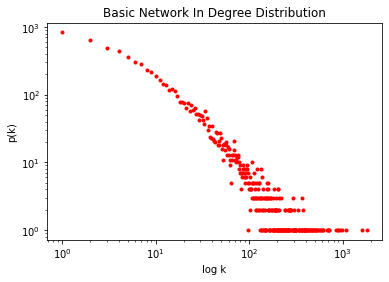

In [7]:
degree_hist_in(G)
plt.title("Basic Network In Degree Distribution")

Text(0.5, 1.0, 'Basic Network Out Degree Distribution')

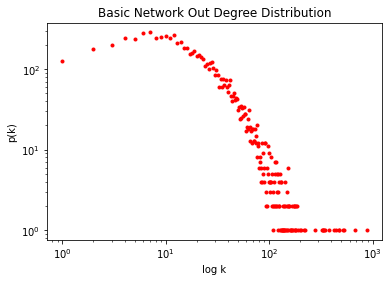

In [8]:
degree_hist_out(G)
plt.title("Basic Network Out Degree Distribution")

The special events networks:

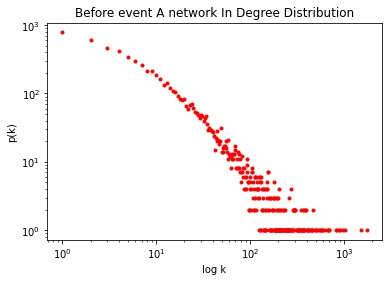

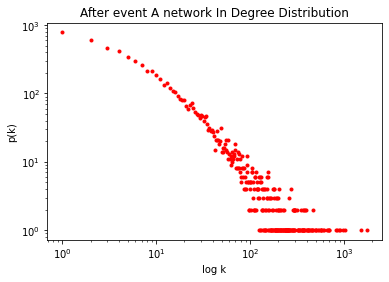

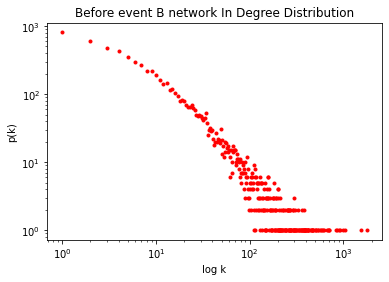

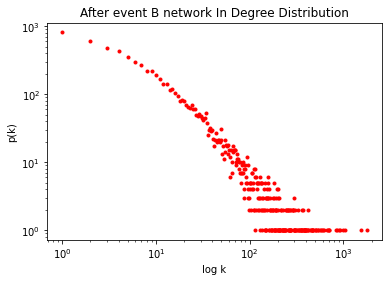

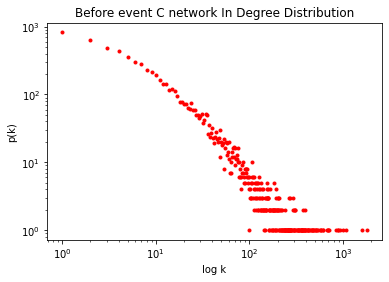

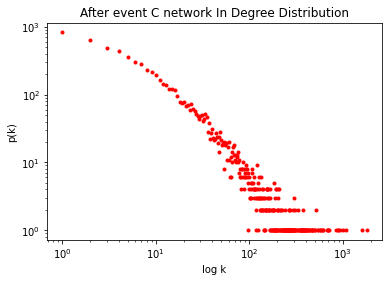

In [9]:
for i in G_events:
    name = "Before event " + i + " network"
    degree_hist_in(G_events[i][0],name)
    plt.title(name +" In Degree Distribution")
    name = "After event " + i + " network"
    degree_hist_in(G_events[i][1],name)
    plt.title(name +" In Degree Distribution")

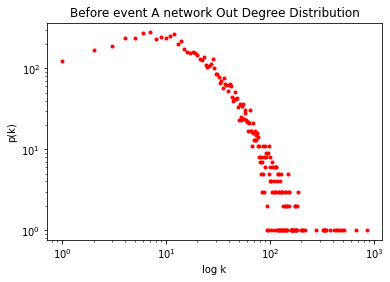

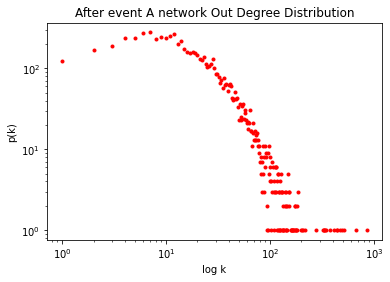

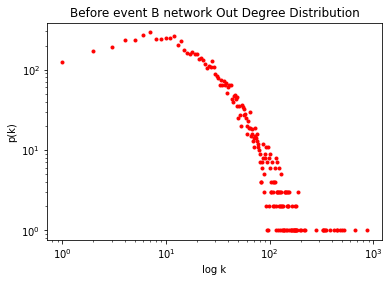

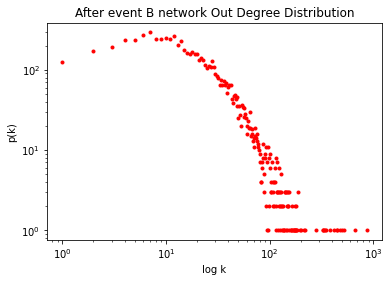

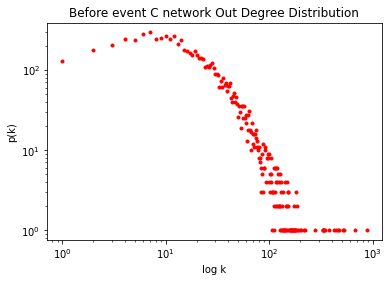

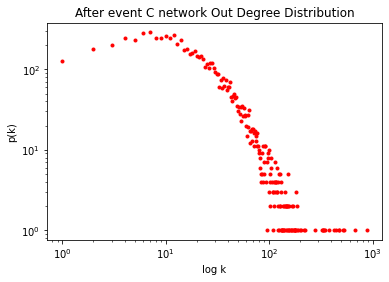

In [10]:
for i in G_events:
    name = "Before event " + i + " network"
    degree_hist_out(G_events[i][0],name)
    plt.title(name +" Out Degree Distribution")
    name = "After event " + i + " network"
    degree_hist_out(G_events[i][1],name)
    plt.title(name +" Out Degree Distribution")

As we can see, in the both of the plots, there is somewhat of a linear trend.

In [11]:
def degree_seq_in(G,name=None):
    degree_sequence = sorted([d for n,d in G.in_degree()],reverse=True)
    plt.xlabel("k")
    plt.ylabel("Number of nodes with k links ")
    plt.plot(degree_sequence, label=name)
    return degree_sequence

In [12]:
def degree_seq_out(G,name=None):
    degree_sequence = sorted([d for n,d in G.out_degree()],reverse=True)
    plt.xlabel("k")
    plt.ylabel("Number of nodes with k links ")
    plt.plot(degree_sequence,label=name)
    return degree_sequence

### Degree Ploting

Basic network - in:

Text(0.5, 1.0, 'Basic network - In')

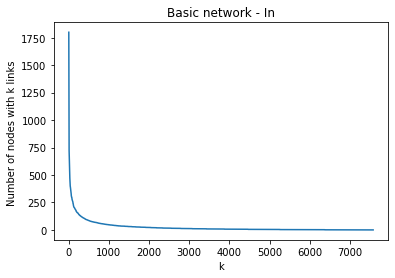

In [13]:
DS_G_in=degree_seq_in(G)
plt.title("Basic network - In")

Out:

Text(0.5, 1.0, 'Basic network - Out')

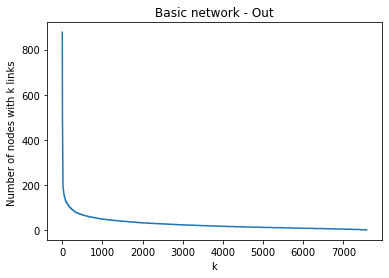

In [14]:
DS_G_out=degree_seq_out(G)
plt.title("Basic network - Out")

Special events networks - in:

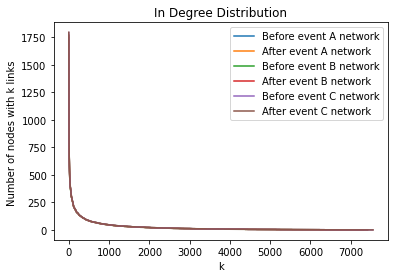

In [15]:
DS_G_events_in = {"A":[],"B":[],"C":[]}
for i in G_events:
    name = "Before event " + i + " network"
    DS_G_events_in[i].append(degree_seq_in(G_events[i][0],name))
    plt.legend()
    name = "After event " + i + " network"
    DS_G_events_in[i].append(degree_seq_in(G_events[i][1],name))
    plt.legend()
    plt.title("In Degree Distribution")

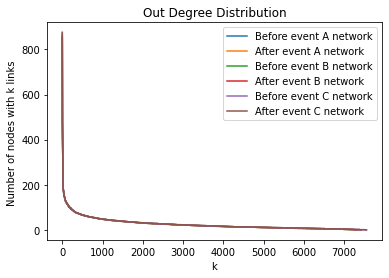

In [16]:
DS_G_events_out = {"A":[],"B":[],"C":[]}
for i in G_events:
    name = "Before event " + i + " network"
    DS_G_events_out[i].append(degree_seq_out(G_events[i][0],name))
    plt.legend()
    name = "After event " + i + " network"
    DS_G_events_out[i].append(degree_seq_out(G_events[i][1],name))
    plt.legend()
    plt.title("Out Degree Distribution")

As we can see, the wikipedia networks is has a power law degree distribution, that indicates that this network is a Scale Free network.

### Fitting power law disribution to our networks

In [17]:
def power_law_fit(degree_sequence):
    fit = powerlaw.Fit(degree_sequence,discrete=True)
    gamma = fit.power_law.alpha
    print("gamma=",gamma)

Basic network:

In [18]:
power_law_fit(DS_G_in)
power_law_fit(DS_G_out)

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
gamma= 3.5540575561183405
Calculating best minimal value for power law fit
gamma= 3.446907590666666


Values less than or equal to 0 in data. Throwing out 0 or negative values


The special events networks - in:

In [19]:
for i in DS_G_events_in:
    str_to_print = "Before event " + i + " network:"
    print(str_to_print)
    power_law_fit(DS_G_events_in[i][0])
    str_to_print = "After event " + i + " network:"
    print(str_to_print)
    power_law_fit(DS_G_events_in[i][1])
    print()

Before event A network:
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


gamma= 2.3753347255033725
After event A network:
Calculating best minimal value for power law fit
gamma= 2.3764298661415033

Before event B network:
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


gamma= 2.3925220513095278
After event B network:
Calculating best minimal value for power law fit
gamma= 3.5368077628280314

Before event C network:
Calculating best minimal value for power law fit
gamma= 2.381435224190949
After event C network:
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


gamma= 3.482718789957848



In [20]:
for i in DS_G_events_out:
    str_to_print = "Before event " + i + " network:"
    print(str_to_print)
    power_law_fit(DS_G_events_out[i][0])
    str_to_print = "After event " + i + " network:"
    print(str_to_print)
    power_law_fit(DS_G_events_out[i][1])
    print()

Before event A network:
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


gamma= 3.5134937263280026
After event A network:
Calculating best minimal value for power law fit
gamma= 3.5131011501746823

Before event B network:
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


gamma= 3.478039085125584
After event B network:
Calculating best minimal value for power law fit
gamma= 3.4778712164392824

Before event C network:
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


gamma= 3.4628631027450285
After event C network:
Calculating best minimal value for power law fit
gamma= 3.462037812810196



### Average Degree

Basic network:

In [21]:
2*G.number_of_edges() / float(G.number_of_nodes())

52.067783199261505

Special events networks:

In [22]:
for i in G_events:
    str_to_print = "Before event " + i + " network:"
    print(str_to_print)
    print(2*G_events[i][0].number_of_edges() / float(G_events[i][0].number_of_nodes()))
    str_to_print = "After event " + i + " network:"
    print(str_to_print)
    print(2*G_events[i][1].number_of_edges() / float(G_events[i][1].number_of_nodes()))
    print()

Before event A network:
51.97319841378367
After event A network:
51.96719518862766

Before event B network:
51.95363256503572
After event B network:
51.93319865319865

Before event C network:
51.82567227447344
After event C network:
51.92038090199709



In [23]:
nx.is_weakly_connected(G)

False